In [155]:
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [157]:
files = glob.glob('../data/interim/erass_simulations/*')
files

['../data/interim/erass_simulations/0_bh_r=0.25.csv',
 '../data/interim/erass_simulations/0_bh_r=0.25_sampled_systems.csv',
 '../data/interim/erass_simulations/0_bh_r=0.5.csv',
 '../data/interim/erass_simulations/0_bh_r=0.5_sampled_systems.csv',
 '../data/interim/erass_simulations/0_bh_r=0.75.csv',
 '../data/interim/erass_simulations/0_bh_r=0.75_sampled_systems.csv',
 '../data/interim/erass_simulations/0_bh_r=0.csv',
 '../data/interim/erass_simulations/0_bh_r=0_sampled_systems.csv',
 '../data/interim/erass_simulations/0_bh_r=1.0.csv',
 '../data/interim/erass_simulations/0_bh_r=1.0_sampled_systems.csv',
 '../data/interim/erass_simulations/1_bh_r=0.25.csv',
 '../data/interim/erass_simulations/1_bh_r=0.25_sampled_systems.csv',
 '../data/interim/erass_simulations/1_bh_r=0.5.csv',
 '../data/interim/erass_simulations/1_bh_r=0.5_sampled_systems.csv',
 '../data/interim/erass_simulations/1_bh_r=0.75.csv',
 '../data/interim/erass_simulations/1_bh_r=0.75_sampled_systems.csv',
 '../data/interim/er

In [158]:
sampled_systems_csvs = []
simulation_results_csvs = []
for f in files:
    if 'sampled_systems' in f:
        sampled_systems_csvs.append(f)
    elif 'parent_population' in f:
        parent_population = pd.read_csv(f)
    elif 'old' in f:
        pass
    else:
        simulation_results_csvs.append(f)

In [159]:
parent_population

,Unnamed: 0,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification,is_bh,P_wind_days,a*,Z
0,4333,27,40.12,1,56,5.928168e-02,0.076959,0.062372,transient,1,18.785525,0.998,0.0002
1,4334,27,40.12,1,57,5.292597e-02,0.065802,0.062372,transient,1,18.785525,0.998,0.0002
2,4423,27,40.12,2,55,5.928168e-02,0.093365,0.062369,transient,1,18.785525,0.998,0.0002
3,4424,27,40.12,2,56,5.292597e-02,0.086447,0.062369,transient,1,18.785525,0.998,0.0002
4,4425,27,40.12,2,57,4.754251e-02,0.076959,0.062369,transient,1,18.785525,0.998,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110452,506499,3796,43.34,45,84,9.300072e-07,2.624724,1.254905,transient,0,52.755073,0.010,0.0002
110453,506500,3796,43.34,45,85,9.300072e-07,2.600890,1.254905,transient,0,52.755073,0.010,0.0002
110454,506501,3796,43.34,45,86,9.300072e-07,2.551391,1.254905,transient,0,52.755073,0.010,0.0002
110455,506502,3796,43.34,45,87,9.300072e-07,2.532188,1.254905,transient,0,52.755073,0.010,0.0002


../data/interim/erass_simulations/0_bh_r=0.25.csv
../data/interim/erass_simulations/0_bh_r=0.5.csv
../data/interim/erass_simulations/0_bh_r=0.75.csv
../data/interim/erass_simulations/0_bh_r=0.csv
../data/interim/erass_simulations/0_bh_r=1.0.csv
../data/interim/erass_simulations/1_bh_r=0.25.csv
../data/interim/erass_simulations/1_bh_r=0.5.csv
../data/interim/erass_simulations/1_bh_r=0.75.csv
../data/interim/erass_simulations/1_bh_r=0.csv
../data/interim/erass_simulations/1_bh_r=1.0.csv
../data/interim/erass_simulations/2_bh_r=0.25.csv
../data/interim/erass_simulations/2_bh_r=0.5.csv
../data/interim/erass_simulations/2_bh_r=0.75.csv
../data/interim/erass_simulations/2_bh_r=0.csv
../data/interim/erass_simulations/2_bh_r=1.0.csv
../data/interim/erass_simulations/3_bh_r=0.25.csv
../data/interim/erass_simulations/3_bh_r=0.5.csv
../data/interim/erass_simulations/3_bh_r=0.75.csv
../data/interim/erass_simulations/3_bh_r=0.csv
../data/interim/erass_simulations/3_bh_r=1.0.csv
../data/interim/eras

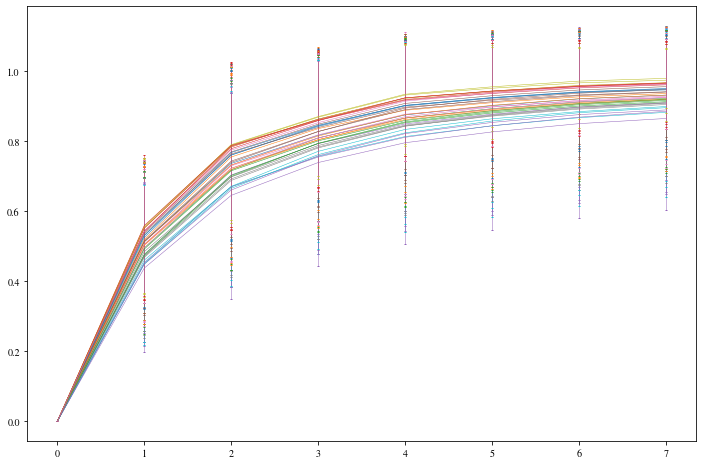

In [160]:
plt.figure(figsize=(12,8))
res = pd.DataFrame()

for f in simulation_results_csvs:
    sim_iteration = f.split('/')[-1].strip('.csv').split('_')[0]
    bh_ratio = f.split('/')[-1].strip('.csv').split('_')[-1].split('=')[-1]
    print(f)
    simulation_results = pd.read_csv(f, index_col=0)
    
    sim_t = simulation_results.T
    
    sim_t['bh_ratio'] = float(bh_ratio)
    sim_t['sim_iteration'] = int(sim_iteration)
    
    res = pd.concat([res,sim_t])
    
    mean = simulation_results.mean(axis=1)
    std = simulation_results.std(axis=1)
    plt.errorbar(mean.index, mean, yerr=std, label=bh_ratio, linestyle='-', capsize=0.9, linewidth=0.5)

#plt.legend()

In [161]:
res

,0,1,2,3,4,5,6,7,bh_ratio,sim_iteration
419465,0.0,0.8107,0.9835,0.9910,1.0000,1.0000,1.0000,1.0000,0.25,0
266317,0.0,0.6047,0.8631,0.9308,1.0000,1.0000,1.0000,1.0000,0.25,0
463306,0.0,0.5860,0.9828,1.0000,1.0000,1.0000,1.0000,1.0000,0.25,0
438756,0.0,0.7306,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.25,0
276774,0.0,0.2981,0.5975,0.8984,1.0000,1.0000,1.0000,1.0000,0.25,0
...,...,...,...,...,...,...,...,...,...,...
421586,0.0,0.1851,0.2745,0.3674,0.4567,0.5143,0.5717,0.6328,0.00,7
266027,0.0,0.7443,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.00,7
505291,0.0,0.6763,0.8530,0.9266,1.0000,1.0000,1.0000,1.0000,0.00,7
451337,0.0,0.2900,0.4273,0.5364,0.6470,0.7596,0.8630,0.9718,0.00,7


In [162]:
# res = res[~res.duplicated(keep=False)]

In [163]:
bh_0 = res[res['bh_ratio']==0]
bh_025 = res[res['bh_ratio']==0.25]
bh_05 = res[res['bh_ratio']==0.5]
bh_075 = res[res['bh_ratio']==0.75]
bh_1 = res[res['bh_ratio']==1]

In [164]:
bh_0_mean = bh_0[[0,1,2,3,4,5,6,7]].mean()
bh_025_mean = bh_025[[0,1,2,3,4,5,6,7]].mean()
bh_05_mean = bh_05[[0,1,2,3,4,5,6,7]].mean()
bh_075_mean = bh_075[[0,1,2,3,4,5,6,7]].mean()
bh_1_mean = bh_1[[0,1,2,3,4,5,6,7]].mean()

bh_0_std = bh_0[[0,1,2,3,4,5,6,7]].std()
bh_025_std = bh_025[[0,1,2,3,4,5,6,7]].std()
bh_05_std = bh_05[[0,1,2,3,4,5,6,7]].std()
bh_075_std = bh_075[[0,1,2,3,4,5,6,7]].std()
bh_1_std = bh_1[[0,1,2,3,4,5,6,7]].mean()

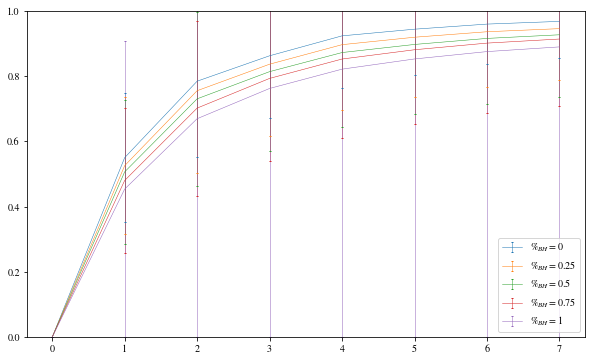

In [165]:
plt.figure(figsize=(10,6))
plt.errorbar(bh_0_mean.index, bh_0_mean, yerr=bh_0_std, label=r'$\%_{BH} = 0$', linestyle='-', capsize=0.9, linewidth=0.5)
plt.errorbar(bh_025_mean.index, bh_025_mean, yerr=bh_025_std, label=r'$\%_{BH} = 0.25$', linestyle='-', capsize=0.9, linewidth=0.5)
plt.errorbar(bh_05_mean.index, bh_05_mean, yerr=bh_05_std, label=r'$\%_{BH} = 0.5$', linestyle='-', capsize=0.9, linewidth=0.5)
plt.errorbar(bh_075_mean.index, bh_075_mean, yerr=bh_075_std, label=r'$\%_{BH} = 0.75$', linestyle='-', capsize=0.9, linewidth=0.5)
plt.errorbar(bh_1_mean.index, bh_1_mean, yerr=bh_1_std, label=r'$\%_{BH} = 1$', linestyle='-', capsize=0.9, linewidth=0.5)
plt.ylim(0,1)
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


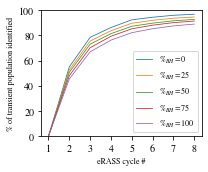

In [181]:

plt.figure(figsize=(3,2.5))
plt.xlabel('eRASS cycle #', fontsize=8)
plt.ylabel('% of transient population identified', fontsize=8)
plt.plot(bh_0_mean.index+1, 100*bh_0_mean, label=r'$\%_{BH} = 0$', linestyle='-', linewidth=0.8)
plt.plot(bh_025_mean.index+1, 100*bh_025_mean, label=r'$\%_{BH} = 25$', linestyle='-', linewidth=0.8)
plt.plot(bh_05_mean.index+1, 100*bh_05_mean, label=r'$\%_{BH} = 50$', linestyle='-', linewidth=0.8)
plt.plot(bh_075_mean.index+1, 100*bh_075_mean, label=r'$\%_{BH} = 75$', linestyle='-', linewidth=0.8)
plt.plot(bh_1_mean.index+1, 100*bh_1_mean, label=r'$\%_{BH} = 100$', linestyle='-', linewidth=0.8)
plt.xticks([1,2,3,4,5,6,7,8])
plt.ylim(0,100)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('../reports/figures/erass_transients.eps')
plt.savefig('../reports/figures/erass_transients.pdf')
plt.savefig('../reports/figures/erass_transients.png')

/home/x1/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/x1/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/x1/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/x1/.local/lib/python3.6/site-packages/pandas/plotting/_m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febe8a1ac88>,
      dtype=object)

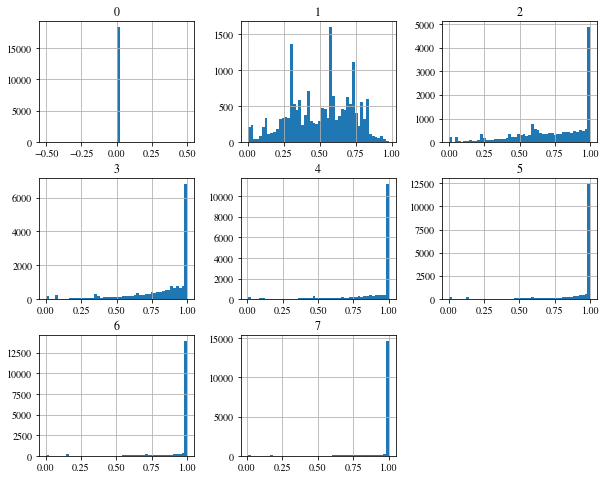

In [167]:
#plt.figure()
#df = bh_0[bh_0[[0,1,2,3,4,5,6,7]] != 1][[0,1,2,3,4,5,6,7]]
df = res[[0,1,2,3,4,5,6,7]]
df.hist(figsize=(10,8),bins=50)

In [168]:
df[1].value_counts()

0.0010    28
0.0011    28
0.0012    27
0.7387    20
0.5790    19
          ..
0.6101     1
0.3416     1
0.2870     1
0.1251     1
0.2500     1
Name: 1, Length: 6539, dtype: int64